<a href="https://colab.research.google.com/github/nimaghoroubi/makeyourownneuralnetwork/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import arange
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import time

Using TensorFlow backend.


In [0]:
!unzip -q "training-data-5400.zip"

In [0]:
#For all new data-set dated 12-Dec
import glob

path = r"training-data/training-data-1000"
all_files = glob.glob(path + "/*.csv")

li = []
new_table_list = []
counter = 0
df2 = pd.DataFrame()

for filename in all_files:
    df = pd.read_csv(filename, header=None)
    new_table_list.append(filename.split("-")[4])

    string = str(new_table_list[counter])
    r_val = string[4:]
    r_val = float(r_val)

    df.columns = ['A', 'B', 'C', r_val]

    df1 = pd.DataFrame(df[r_val])
    df2 = df2.append(df1.T)

    counter = counter + 1
df2 = df2.reset_index()
df2 = df2.rename(columns={'index':'Rval'})
df2

,Rval,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,8060,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,2.259,0.000716,0.000888,0.000955,0.001109,0.001109,0.000951,0.000951,0.000951,0.000951,0.001110,0.000999,0.000878,0.000937,0.000951,0.001121,0.001002,0.000879,0.000938,0.000951,0.001110,0.000999,0.000878,0.000937,0.000946,0.000993,0.000946,0.000929,0.000865,0.000913,0.000951,0.000951,0.000951,0.001110,0.000999,0.000878,0.000937,0.000951,0.000951,0.000929,...,0.000951,0.000951,0.000951,0.000951,0.000913,0.000865,0.000929,0.000951,0.000951,0.000937,0.000878,0.000999,0.001110,0.000951,0.000938,0.000879,0.001002,0.001002,0.000879,0.000938,0.000951,0.000951,0.000938,0.000879,0.001002,0.001002,0.000879,0.000938,0.000946,0.001939,0.013783,0.014734,0.017301,0.023676,0.000968,0.003589,0.000923,0.003472,0.004351,0.000716
1,2.286,0.000725,0.001623,0.000966,0.001122,0.001122,0.000962,0.000962,0.000962,0.000962,0.001123,0.001011,0.000888,0.000949,0.000962,0.001134,0.001014,0.000890,0.000950,0.000962,0.001123,0.001011,0.000888,0.000949,0.000957,0.001005,0.000957,0.000941,0.000875,0.000924,0.000962,0.000962,0.000962,0.001123,0.001011,0.000888,0.000949,0.000962,0.000962,0.000941,...,0.000962,0.000962,0.000962,0.000962,0.000924,0.000875,0.000941,0.000962,0.000962,0.000949,0.000888,0.001011,0.001123,0.000962,0.000950,0.000890,0.001014,0.001014,0.000890,0.000950,0.000962,0.000962,0.000950,0.000890,0.001014,0.001014,0.000890,0.000950,0.000957,0.001005,0.018172,0.019134,0.021732,0.022686,0.000980,0.005490,0.000934,0.000990,0.001880,0.000725
2,2.625,0.000832,0.001032,0.001110,0.001289,0.001288,0.001105,0.001105,0.001105,0.001105,0.001290,0.001161,0.001020,0.001089,0.001105,0.001303,0.001164,0.001022,0.001090,0.001105,0.001290,0.001161,0.001020,0.001089,0.001099,0.001154,0.001099,0.001080,0.001005,0.001061,0.001105,0.001105,0.001105,0.001290,0.001161,0.001020,0.001089,0.001105,0.001105,0.001080,...,0.001105,0.001105,0.001105,0.001105,0.001061,0.001005,0.001080,0.001105,0.001105,0.001089,0.001020,0.001161,0.001290,0.001105,0.001090,0.001022,0.001164,0.001164,0.001022,0.001090,0.001105,0.001105,0.001090,0.001022,0.001164,0.001164,0.001022,0.001090,0.001099,0.002253,0.012107,0.013212,0.016195,0.019424,0.001125,0.004171,0.001073,0.004034,0.005057,0.000832
3,0.027,0.000009,0.000019,0.000011,0.000013,0.000013,0.000011,0.000011,0.000023,0.000011,0.000025,0.000012,0.000010,0.000022,0.000011,0.000025,0.000012,0.000011,0.000022,0.000011,0.000025,0.000012,0.000010,0.000022,0.000011,0.000012,0.000023,0.000011,0.000010,0.000021,0.000011,0.000023,0.000011,0.000025,0.000012,0.000010,0.000022,0.000011,0.000011,0.000011,...,0.000033,0.000044,0.000056,0.000067,0.000011,0.000010,0.000021,0.000011,0.000011,0.000011,0.000010,0.000012,0.000013,0.000011,0.000011,0.000011,0.000012,0.000012,0.000011,0.000022,0.000033,0.000044,0.000056,0.000011,0.000022,0.000034,0.000011,0.000022,0.000033,0.000012,0.000023,0.000035,0.000046,0.000057,0.000069,0.002700,0.000011,0.000030,0.000041,0.000009
4,0.087,0.000028,0.000034,0.000037,0.000043,0.000043,0.000037,0.000037,0.000073,0.000037,0.000079,0.000038,0.000034,0.000070,0.000037,0.000080,0.000039,0.000034,0.000070,0.000037,0.000079,0.000038,0.000034,0.000070,0.000036,0.000038,0.000036,0.000036,0.000033,0.000035,0.000037,0.000073,0.000037,0.000043,0.000038,0.000034,0.000036,0.000037,0.000037,0.000036,...,0.000037,0.000073,0.000037,0.000073,0.000035,0.000033,0.000069,0.000037,0.000037,0.000036,0.000034,0.000038,0.000043,0.000037,0.000036,0.000034,0.000039,0.000039,0.000034,0.000070,0.000037,0.000073,0.000036,0.000034,0.000039,0.000039,0.000034,0.000070,0.000036,0.000038,0.000075,0.000111,0.000148,0.000184,0.000037,0.000073,0.000036,0.000038,0.000034,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

[]

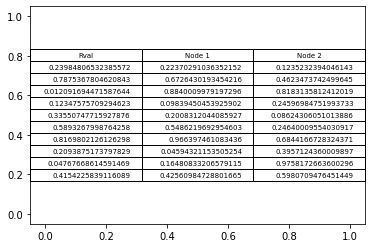

In [0]:
fig, axs =plt.subplots(1,1)
clust_data = np.random.random((10,3))
collabel=("Rval", "Node 1", "Node 2")
the_table = axs.table(cellText=clust_data,colLabels=collabel,loc='center')

axs.plot()

In [0]:
main = pd.DataFrame(np.zeros((df2.shape[0],df2.shape[1])))
main[0] = df2['Rval']
target = df2
train = main

In [0]:
print(train.shape[1])
print(target.shape[1])

8101
8101


In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(train.shape[1], kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
#NN_model.summary()

In [0]:
print('Start timing')
start = time.time()
history = NN_model.fit(train, target, epochs=500, batch_size=30, validation_split = 0.3)
end = time.time()
print(end - start)

Start timing



Train on 700 samples, validate on 300 samples
Epoch 1/500





700/700 [==============================] - 10s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - acc: 0.0000e+00 - val_loss: 0.0202 - val_mean_absolute_error: 0.0202 - val_acc: 0.0000e+00
Epoch 2/500
700/700 [==============================] - 0s 428us/step - loss: 0.0188 - mean_absolute_error: 0.0188 - acc: 0.0000e+00 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189 - val_acc: 0.0000e+00
Epoch 3/500
700/700 [==============================] - 0s 397us/step - loss: 0.0178 - mean_absolute_error: 0.0178 - acc: 0.0000e+00 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181 - val_acc: 0.0000e+00
Epoch 4/500
700/700 [==============================] - 0s 408us/step - loss: 0.0171 - mean_absolute_error: 0.0171 - acc: 0.0000e+00 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173 - val_acc: 0.0000e+00
Epoch 5/500
700/700 [==============================] - 0s 422us/step - loss: 0.0164 - mean_absolute_error

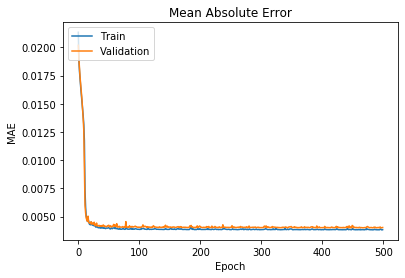

In [0]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('MAE.png',format='png',dpi=1200)
plt.show()

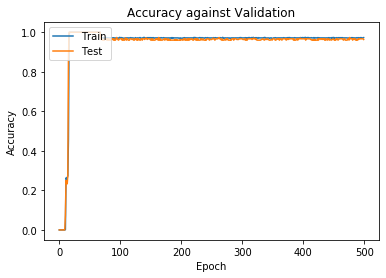

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy against Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Acc.png',format='png',dpi=1200)
plt.show()

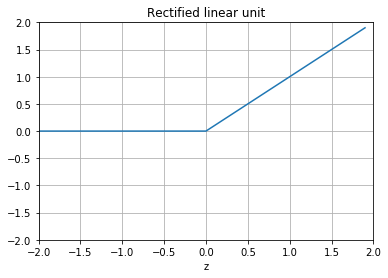

In [0]:
z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')
plt.savefig('ReLu.png',format='png',dpi=1200)
plt.show()

In [0]:
Rval = np.arange(0.00,10.00,0.01)
Rval = Rval[0:df2.shape[0]]
test = pd.DataFrame(np.zeros((df2.shape[0],df2.shape[1])))
test[0] = Rval.T
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,9.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,9.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,9.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print('Start timing for predictions')
start = time.time()
predictions = NN_model.predict(test)
end = time.time()
print(end - start)

Start timing for predictions
0.09470534324645996


In [0]:
pred = pd.DataFrame(predictions)
pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
0,0.060594,0.000100,-8.158386e-07,0.000045,0.000258,-0.000153,-0.000126,-0.000131,-0.000212,0.000241,0.000200,-0.000245,0.000106,-0.000208,0.000280,0.000131,-0.000218,-0.000122,-0.000168,-0.000125,0.000197,0.000211,-0.000005,0.000008,-0.000061,0.000127,0.000184,-0.000260,0.000445,-0.000024,0.000221,0.000496,0.000135,0.000192,-0.000146,-0.000077,-0.000174,0.000101,-0.000137,-0.000205,...,0.000039,0.000077,-0.000151,0.000024,0.000073,0.000265,0.000353,0.000382,-0.000084,0.000174,-0.000205,0.000361,-0.000044,-0.000680,0.000413,0.000097,0.000243,0.000153,0.000026,0.000065,0.000329,0.000248,0.000265,0.000163,-0.000302,0.000041,0.000046,0.000182,-0.000039,-0.000023,0.000076,0.000837,0.000316,0.020795,0.008133,0.000037,-0.000268,-0.000700,0.000307,-0.000014
1,0.060594,0.000100,-8.158386e-07,0.000045,0.000258,-0.000153,-0.000126,-0.000131,-0.000212,0.000241,0.000200,-0.000245,0.000106,-0.000208,0.000280,0.000131,-0.000218,-0.000122,-0.000168,-0.000125,0.000197,0.000211,-0.000005,0.000008,-0.000061,0.000127,0.000184,-0.000260,0.000445,-0.000024,0.000221,0.000496,0.000135,0.000192,-0.000146,-0.000077,-0.000174,0.000101,-0.000137,-0.000205,...,0.000039,0.000077,-0.000151,0.000024,0.000073,0.000265,0.000353,0.000382,-0.000084,0.000174,-0.000205,0.000361,-0.000044,-0.000680,0.000413,0.000097,0.000243,0.000153,0.000026,0.000065,0.000329,0.000248,0.000265,0.000163,-0.000302,0.000041,0.000046,0.000182,-0.000039,-0.000023,0.000076,0.000837,0.000316,0.020795,0.008133,0.000037,-0.000268,-0.000700,0.000307,-0.000014
2,0.060594,0.000100,-8.158386e-07,0.000045,0.000258,-0.000153,-0.000126,-0.000131,-0.000212,0.000241,0.000200,-0.000245,0.000106,-0.000208,0.000280,0.000131,-0.000218,-0.000122,-0.000168,-0.000125,0.000197,0.000211,-0.000005,0.000008,-0.000061,0.000127,0.000184,-0.000260,0.000445,-0.000024,0.000221,0.000496,0.000135,0.000192,-0.000146,-0.000077,-0.000174,0.000101,-0.000137,-0.000205,...,0.000039,0.000077,-0.000151,0.000024,0.000073,0.000265,0.000353,0.000382,-0.000084,0.000174,-0.000205,0.000361,-0.000044,-0.000680,0.000413,0.000097,0.000243,0.000153,0.000026,0.000065,0.000329,0.000248,0.000265,0.000163,-0.000302,0.000041,0.000046,0.000182,-0.000039,-0.000023,0.000076,0.000837,0.000316,0.020795,0.008133,0.000037,-0.000268,-0.000700,0.000307,-0.000014
3,0.060594,0.000100,-8.158386e-07,0.000045,0.000258,-0.000153,-0.000126,-0.000131,-0.000212,0.000241,0.000200,-0.000245,0.000106,-0.000208,0.000280,0.000131,-0.000218,-0.000122,-0.000168,-0.000125,0.000197,0.000211,-0.000005,0.000008,-0.000061,0.000127,0.000184,-0.000260,0.000445,-0.000024,0.000221,0.000496,0.000135,0.000192,-0.000146,-0.000077,-0.000174,0.000101,-0.000137,-0.000205,...,0.000039,0.000077,-0.000151,0.000024,0.000073,0.000265,0.000353,0.000382,-0.000084,0.000174,-0.000205,0.000361,-0.000044,-0.000680,0.000413,0.000097,0.000243,0.000153,0.000026,0.000065,0.000329,0.000248,0.000265,0.000163,-0.000302,0.000041,0.000046,0.000182,-0.000039,-0.000023,0.000076,0.000837,0.000316,0.020795,0.008133,0.000037,-0.000268,-0.000700,0.000307,-0.000014
4,0.062861,0.000112,-9.793555e-06,0.000046,0.000243,-0.000151,-0.000130,-0.000120,-0.000237,0.000242,0.000212,-0.000230,0.000104,-0.000205,0.000288,0.000147,-0.000230,-0.000116,-0.000187,-0.000114,0.000191,0.000203,-0.000008,0.000015,-0.000060,0.000122,0.000183,-0.000257,0.000450,-0.000040,0.000238,0.000527,0.000131,0.000190,-0.000127,-0.000102,-0.000166,0.000102,-0.000130,-0.000196,...,0.000043,0.000063,-0.000179,0.000044,0.000047,0.000278,0.000352,0.000376,-0.000068,0.000173,-0.000214,0.000351,-0.000033,-0.000670,0.000429,0.000084,0.000241,0.000158,0.000032,0.000065,0.000353,0.000278,0.000244,0.000169,-0.000300,0.000035,0.000065,0.

In [0]:
test = df2[800:1000]
predictions = NN_model.predict(test)
y_pred = abs(pd.DataFrame(predictions))
y_pred.to_csv(r'5400_1000_200.csv')

In [0]:
#Best: -0.004705 using {'batch_size': 60, 'epochs': 100}
# -0.003991 using {'batch_size': 150, 'epochs': 100} for 3k data
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasClassifier
def create_model():
  NN_model = Sequential()
  # The Input Layer :
  NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

  # The Hidden Layers :
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

  # The Output Layer :
  NN_model.add(Dense(train.shape[1], kernel_initializer='normal',activation='linear'))

  # Compile the network :
  NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
  return NN_model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasRegressor(build_fn=create_model, verbose=False)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100, 150, 200]
epochs = [100,200,300, 400, 500, 600, 700]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train, target)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))









Best: -0.007146 using {'batch_size': 20, 'epochs': 700}
-0.008418 (0.003037) with: {'batch_size': 10, 'epochs': 100}
-0.007558 (0.002053) with: {'batch_size': 10, 'epochs': 200}
-0.009614 (0.004931) with: {'batch_size': 10, 'epochs': 300}
-0.008802 (0.003735) with: {'batch_size': 10, 'epochs': 400}
-0.008167 (0.002874) with: {'batch_size': 10, 'epochs': 500}
-0.008271 (0.003021) with: {'batch_size': 10, 'epochs': 600}
-0.008727 (0.002722) with: {'batch_size': 10, 'epochs': 700}
-0.008321 (0.003041) with: {'batch_size': 20, 'epochs': 100}
-0.008548 (0.003325) with: {'batch_size': 20, 'epochs': 200}
-0.011663 (0.007505) with: {'batch_size': 20, 'epochs': 300}
-0.015007 (0.012348) with: {'batch_size': 20, 'epochs': 400}
-0.007574 (0.001741) with: {'batch_size': 20, 'epochs': 500}
-0.011521 (0.007437) with: {'batch_size': 20, 'epochs': 600}
-0.007146 (0.001673) with: {'batch_size': 20, 'epochs': 700}
-0.008362 (0.003080) with: {'batch_size': 40, 'epochs': 100}
-0.008387 (0.003106) 

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [0]:
def create_model(optimizer='adam'):
  NN_model = Sequential()
  
  NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

  # The Hidden Layers :
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
  NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))

  # The Output Layer :
  NN_model.add(Dense(2551, kernel_initializer='normal',activation='linear'))

  # Compile the network :
  NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
  return NN_model
seed = 7
numpy.random.seed(seed)
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=60, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train, target)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.004632 using {'optimizer': 'Nadam'}
-0.004800 (0.001654) with: {'optimizer': 'SGD'}
-0.004867 (0.001587) with: {'optimizer': 'RMSprop'}
-0.004780 (0.001688) with: {'optimizer': 'Adagrad'}
-0.004753 (0.001651) with: {'optimizer': 'Adadelta'}
-0.004732 (0.001587) with: {'optimizer': 'Adam'}
-0.004872 (0.001828) with: {'optimizer': 'Adamax'}
-0.004632 (0.001714) with: {'optimizer': 'Nadam'}


In [0]:
!mkdir Checkpoints 
checkpoint_name = 'Checkpoints/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(train, target, epochs=700, batch_size=20, validation_split = 0.3, callbacks=callbacks_list)




Train on 2099 samples, validate on 900 samples
Epoch 1/700





2099/2099 [==============================] - 6s 3ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - acc: 0.1091 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.01407, saving model to Checkpoints/Weights-001--0.01407.hdf5
Epoch 2/700
2099/2099 [==============================] - 1s 371us/step - loss: 0.0035 - mean_absolute_error: 0.0035 - acc: 1.0000 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.01407 to 0.01355, saving model to Checkpoints/Weights-002--0.01355.hdf5
Epoch 3/700
2099/2099 [==============================] - 1s 354us/step - loss: 0.0032 - mean_absolute_error: 0.0032 - acc: 1.0000 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.01355 to 0.01317, saving model to Checkpoints/Weights-003--0.01317.hdf5
Epoch 4/700
209

In [0]:
# Load wights file of the best model :
wights_file = 'Checkpoints/Weights-187--0.00486.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
test = df2[200:250]
predictions = NN_model.predict(test)
y_pred = abs(pd.DataFrame(predictions))
y_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
0,0.136901,0.000289,0.000323,0.000104,0.000502,0.000076,0.000762,0.000156,0.000206,0.000912,0.000213,0.000300,0.000285,0.000156,0.000469,0.000020,1.692679e-07,0.000654,0.000426,0.000118,0.000076,0.000103,0.000583,0.000121,0.000073,0.000181,0.000141,0.000314,0.000111,0.000409,0.000291,0.000160,0.000188,0.000345,0.000224,0.000320,0.000646,0.000466,0.000616,0.000020,...,0.000169,0.000210,0.000248,4.287576e-07,0.000360,0.000424,0.000247,0.000406,0.000094,0.000357,0.000801,0.000235,0.000290,0.000024,0.000134,0.000217,0.000118,0.000363,0.000113,0.000210,0.000264,0.000311,0.000199,0.000063,0.000153,0.000276,0.000189,0.000147,0.000060,0.000557,0.000300,0.000222,0.000130,0.032095,0.013388,0.000465,0.000139,0.000070,0.000227,0.000018
1,4.161448,0.007069,0.002558,0.006324,0.001617,0.004314,0.004521,0.005379,0.011237,0.019477,0.013909,0.002257,0.020698,0.000164,0.002802,0.010736,8.162922e-03,0.019589,0.004492,0.006971,0.012153,0.006043,0.015023,0.011978,0.008130,0.011019,0.009769,0.017688,0.003487,0.024998,0.005458,0.000533,0.001418,0.011760,0.002283,0.025820,0.006615,0.012621,0.014617,0.022466,...,0.010148,0.006249,0.026467,5.255426e-03,0.009161,0.001575,0.000143,0.004432,0.004723,0.004741,0.023998,0.001814,0.005183,0.001726,0.009584,0.014632,0.008198,0.003120,0.019332,0.031759,0.001645,0.001782,0.021829,0.002211,0.011359,0.021788,0.025485,0.002252,0.002868,0.013773,0.001384,0.004933,0.012505,1.033887,0.912151,0.020132,0.003441,0.000966,0.008188,0.006677
2,0.344760,0.000149,0.000294,0.000184,0.000820,0.000669,0.000817,0.000245,0.000341,0.000932,0.000288,0.000425,0.000146,0.000136,0.000129,0.000017,6.412284e-05,0.000012,0.000421,0.000035,0.000190,0.000375,0.000767,0.000595,0.000350,0.000084,0.000147,0.000427,0.000149,0.000260,0.000305,0.000231,0.000033,0.000242,0.000532,0.000230,0.000599,0.000159,0.000362,0.000052,...,0.000006,0.000257,0.000021,2.508333e-04,0.000656,0.000762,0.000049,0.000675,0.000031,0.000107,0.000927,0.000232,0.000169,0.000137,0.000069,0.000073,0.000492,0.000342,0.000092,0.000017,0.000275,0.000220,0.000327,0.000065,0.000089,0.000165,0.000003,0.000095,0.000347,0.000660,0.000198,0.000272,0.000397,0.022151,0.010022,0.000499,0.000167,0.000485,0.000411,0.000109
3,1.533932,0.004435,0.002577,0.000203,0.002565,0.003160,0.001131,0.000317,0.002221,0.000231,0.004392,0.000490,0.003529,0.002211,0.001552,0.000226,7.342606e-03,0.002067,0.002348,0.001186,0.001761,0.002441,0.006669,0.000657,0.001598,0.001473,0.004181,0.005214,0.004197,0.002490,0.000333,0.000435,0.001490,0.002612,0.001503,0.004329,0.002936,0.000587,0.000763,0.005172,...,0.002180,0.001387,0.006675,2.062787e-03,0.001839,0.002646,0.000416,0.000203,0.001698,0.001161,0.005323,0.000840,0.001317,0.001990,0.002564,0.003082,0.000871,0.000556,0.004847,0.007088,0.001297,0.003189,0.001851,0.000884,0.002062,0.005611,0.003364,0.000103,0.004125,0.002005,0.003177,0.003458,0.004998,0.186874,0.148312,0.002937,0.003188,0.001985,0.001812,0.001010
4,0.842596,0.000099,0.000544,0.000860,0.000552,0.001464,0.000931,0.000743,0.000111,0.001800,0.000080,0.000300,0.001462,0.000958,0.001076,0.000027,1.987524e-03,0.000561,0.002087,0.000609,0.000857,0.000002,0.001159,0.000149,0.001219,0.000082,0.001210,0.000832,0.001263,0.000488,0.000394,0.000587,0.000413,0.000034,0.000098,0.000318,0.000873,0.000803,0.000121,0.001767,...,0.000047,0.001394,0.001183,8.713651e-04,0.000352,0.000340,0.000274,0.000233,0.000064,0.000107,0.000816,0.000347,0.000722,0.000464,0.000177,0.000226,0.001315,0.001067,0.000607,0.001323,0.000145,0.000522,0.000971,0.000815,0.000161,0.000938,0.000636,0.000548,0.001522,0.000438,0.000134,0.000968,0.002303,0.007034,0.002921,0.000040,0.000658,0.001477,0.000338,0.000579
5,0.740930,0.00

In [0]:
y_pred.to_csv(r'850_250_50.csv')

In [0]:
ypred = pd.DataFrame(predictions)
test

,Rval,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
200,2.27,0.000720,0.001612,0.000960,0.001114,0.001004,0.000882,0.000942,0.000955,0.001115,0.000964,0.000865,0.000869,0.000918,0.000955,0.000955,0.000955,0.001115,0.000964,0.000865,0.000869,0.000918,0.000955,0.000955,0.000955,0.001115,0.000964,0.000865,0.000869,0.000918,0.000955,0.000955,0.000955,0.001115,0.000964,0.000865,0.000869,0.000918,0.000955,0.000955,...,0.000884,0.000943,0.000955,0.000955,0.000943,0.000884,0.001007,0.001007,0.000884,0.000943,0.000955,0.000955,0.000943,0.000884,0.001007,0.001007,0.000884,0.000943,0.000955,0.000955,0.000943,0.000884,0.001007,0.001007,0.000884,0.000943,0.000955,0.000955,0.000955,0.555966,0.560266,0.561135,0.563992,0.564947,0.571890,0.572845,0.000955,0.000960,0.000892,0.000720
201,2.29,0.000726,0.001626,0.000968,0.001124,0.001013,0.000889,0.000950,0.000964,0.001125,0.000973,0.000873,0.000877,0.000926,0.000964,0.000964,0.000964,0.001125,0.000973,0.000873,0.000877,0.000926,0.000964,0.000964,0.000964,0.001125,0.000973,0.000873,0.000877,0.000926,0.000964,0.000964,0.000964,0.001125,0.000973,0.000873,0.000877,0.000926,0.000964,0.000964,...,0.000892,0.000951,0.000964,0.000964,0.000951,0.000892,0.001016,0.001016,0.000892,0.000951,0.000964,0.000964,0.000951,0.000892,0.001016,0.001016,0.000892,0.000951,0.000964,0.000964,0.000951,0.000892,0.001016,0.001016,0.000892,0.000951,0.000964,0.000964,0.000964,0.559453,0.562145,0.563022,0.564148,0.565112,0.566075,0.567039,0.000964,0.000968,0.000900,0.000726
202,2.31,0.000732,0.001640,0.000977,0.001134,0.001021,0.000897,0.000959,0.000972,0.001135,0.000981,0.000880,0.000885,0.000934,0.000972,0.000972,0.000972,0.001135,0.000981,0.000880,0.000885,0.000934,0.000972,0.000972,0.000972,0.001135,0.000981,0.000880,0.000885,0.000934,0.000972,0.000972,0.000972,0.001135,0.000981,0.000880,0.000885,0.000934,0.000972,0.000972,...,0.000899,0.000960,0.000972,0.000972,0.000960,0.000899,0.001025,0.001025,0.000899,0.000960,0.000972,0.000972,0.000960,0.000899,0.001025,0.001025,0.000899,0.000960,0.000972,0.000972,0.000960,0.000899,0.001025,0.001025,0.000899,0.000960,0.000972,0.000972,0.000972,0.000972,0.570138,0.571023,0.573930,0.574902,0.000972,0.001944,0.000972,0.000977,0.001884,0.000732
203,2.32,0.000736,0.001647,0.000981,0.001139,0.001026,0.000901,0.000963,0.000976,0.001140,0.000986,0.000884,0.000888,0.000938,0.000976,0.000976,0.000976,0.001140,0.000986,0.000884,0.000888,0.000938,0.000976,0.000976,0.000976,0.001140,0.000986,0.000884,0.000888,0.000938,0.000976,0.000976,0.000976,0.001140,0.000986,0.000884,0.000888,0.000938,0.000976,0.000976,...,0.000903,0.000964,0.000976,0.000976,0.000964,0.000903,0.001029,0.001029,0.000903,0.000964,0.000976,0.000976,0.000964,0.000903,0.001029,0.001029,0.000903,0.000964,0.000976,0.000976,0.000964,0.000903,0.001029,0.001029,0.000903,0.000964,0.000976,0.000976,0.000976,0.001952,0.572606,0.573495,0.578237,0.579213,0.580189,0.581166,0.000976,0.011934,0.012846,0.000736
204,2.33,0.000739,0.001654,0.000985,0.001144,0.001030,0.000905,0.000967,0.000980,0.001145,0.000990,0.000888,0.000892,0.000942,0.000980,0.000980,0.000980,0.001145,0.000990,0.000888,0.000892,0.000942,0.000980,0.000980,0.000980,0.001145,0.000990,0.000888,0.000892,0.000942,0.000980,0.000980,0.000980,0.001145,0.000990,0.000888,0.000892,0.000942,0.000980,0.000980,...,0.000907,0.000968,0.000980,0.000980,0.000968,0.000907,0.001033,0.001033,0.000907,0.000968,0.000980,0.000980,0.000968,0.000907,0.001033,0.001033,0.000907,0.000968,0.000980,0.000980,0.000968,0.000907,0.001033,0.001033,0.000907,0.000968,0.000980,0.000980,0.000980,0.575686,0.576628,0.577521,0.587375,0.588355,0.589336,0.000980,0.000980,0.000985,0.000916,0.000739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
y_pred = y_pred.round(4)
resultA = test.round(4)

In [0]:
resultA = resultA.drop(['Rval'],axis = 1)
resultA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
200,0.0007,0.0016,0.0010,0.0011,0.0010,0.0009,0.0009,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,...,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0009,0.0009,0.0010,0.0010,0.0010,0.5560,0.5603,0.5611,0.5640,0.5649,0.5719,0.5728,0.0010,0.0010,0.0009,0.0007
201,0.0007,0.0016,0.0010,0.0011,0.0010,0.0009,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,...,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.5595,0.5621,0.5630,0.5641,0.5651,0.5661,0.5670,0.0010,0.0010,0.0009,0.0007
202,0.0007,0.0016,0.0010,0.0011,0.0010,0.0009,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,...,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0010,0.5701,0.5710,0.5739,0.5749,0.0010,0.0019,0.0010,0.0010,0.0019,0.0007
203,0.0007,0.0016,0.0010,0.0011,0.0010,0.0009,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,...,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0020,0.5726,0.5735,0.5782,0.5792,0.5802,0.5812,0.0010,0.0119,0.0128,0.0007
204,0.0007,0.0017,0.0010,0.0011,0.0010,0.0009,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,0.0011,0.0010,0.0009,0.0009,0.0009,0.0010,0.0010,0.0010,...,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.0009,0.0010,0.0010,0.0009,0.0010,0.0010,0.0010,0.0010,0.5757,0.5766,0.5775,0.5874,0.5884,0.5893,0.0010,0.0010,0.0010,0.0009,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.0009,0.0012,0.0012,0.0014,0.0013,0.0011,0.0012,0.0012,0.0014,0.0013,0.0011,0.0011,0.0012,0.0012,0.0012,0.0012,0.0014,0.0013,0.0011,0.0011,0.0012,0.0012,0.0012,0.0012,0.0014,0.0013,0.0011,0.0011,0.0012,0.0012,0.0012,0.0012,0.0014,0.0013,0.0011,0.0011,0.0012,0.0012,0.0012,0.0012,...,0.0011,0.0012,0.0012,0.0012,0.0012,0.0011,0.0013,0.0013,0.0011,0.0012,0.0012,0.0012,0.0012,0.0011,0.0013,0.0013,0.0011,0.0012,0.0012,0.0012,0.0012,0.0011,0.0013,0.0013,0.0011,0.0012,0.0012,0.0012,0.0012,0.7258,0.7313,0.7325,0.738

In [0]:
ypred = ypred.drop([0],axis = 1)
ypred

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550
0,-0.0001,0.0022,0.0049,0.0001,0.0052,0.0094,-0.0039,0.0064,0.0032,0.0076,-0.0037,-0.0067,0.0096,0.0045,0.0002,-0.0056,-0.0000,-0.0033,0.0013,0.0047,0.0032,-0.0012,0.0095,0.0075,0.0092,0.0022,-0.0005,-0.0037,-0.0033,0.0053,0.0028,0.0041,0.0086,0.0067,-0.0046,-0.0049,0.0016,0.0052,-0.0069,0.0048,...,-0.0027,-0.0001,-0.0007,-0.0022,-0.0015,-0.0004,-0.0013,-0.0072,-0.0039,0.0036,0.0105,0.0044,-0.0039,0.0004,-0.0001,0.0075,0.0120,-0.0020,0.0071,0.0108,0.0041,0.0032,0.0031,0.0048,-0.0004,-0.0021,0.0041,0.0025,0.0004,0.0048,0.6876,0.0222,0.4675,0.0148,-0.0008,0.0022,-0.0002,0.0062,0.0031,0.0007
1,-0.0016,0.0029,0.0058,-0.0046,0.0113,0.0110,-0.0031,0.0081,0.0045,0.0084,-0.0059,-0.0117,0.0100,0.0009,0.0014,-0.0062,-0.0032,-0.0075,-0.0023,0.0053,0.0066,-0.0031,0.0154,0.0065,0.0101,0.0026,-0.0024,-0.0059,-0.0049,0.0076,0.0051,0.0010,0.0053,0.0072,-0.0074,-0.0046,0.0050,0.0071,-0.0063,0.0064,...,-0.0050,-0.0003,-0.0014,-0.0040,0.0037,-0.0040,-0.0021,-0.0116,-0.0057,0.0061,0.0131,0.0054,-0.0065,0.0015,-0.0014,0.0091,0.0126,0.0009,0.0087,0.0128,0.0002,0.0025,0.0015,0.0087,-0.0060,-0.0025,0.0056,0.0035,0.0012,0.0051,0.6119,0.0182,0.4185,0.0138,-0.0022,-0.0006,-0.0047,0.0089,0.0038,0.0020
2,-0.0073,0.0038,0.0028,-0.0016,0.0120,0.0090,-0.0031,0.0032,0.0024,0.0026,-0.0007,-0.0130,0.0059,0.0028,0.0022,-0.0015,-0.0020,-0.0024,-0.0013,0.0055,0.0058,-0.0001,0.0132,0.0068,0.0056,0.0052,-0.0013,0.0019,-0.0050,0.0057,0.0013,-0.0002,0.0030,0.0067,-0.0026,-0.0000,0.0036,0.0088,-0.0035,0.0038,...,-0.0026,-0.0008,-0.0033,-0.0054,0.0061,-0.0031,0.0023,-0.0089,-0.0031,0.0044,0.0084,0.0003,-0.0015,-0.0025,0.0004,0.0072,0.0064,0.0034,0.0037,0.0058,0.0030,0.0008,-0.0053,0.0072,0.0004,-0.0041,0.0045,0.0046,0.0025,0.0067,0.7937,0.0197,0.5393,0.0183,0.0006,-0.0007,0.0006,0.0034,0.0031,0.0026
3,-0.0091,0.0053,0.0076,-0.0051,0.0044,0.0163,-0.0034,0.0048,0.0015,0.0075,-0.0037,-0.0104,0.0056,0.0036,0.0033,-0.0066,-0.0082,-0.0076,-0.0047,0.0041,0.0028,-0.0029,0.0179,0.0048,0.0048,0.0079,0.0005,-0.0007,-0.0015,0.0083,0.0066,-0.0051,0.0087,0.0111,-0.0052,-0.0031,0.0037,0.0109,-0.0020,0.0021,...,-0.0034,-0.0019,0.0006,0.0012,0.0109,-0.0025,0.0052,-0.0084,0.0005,0.0042,0.0157,0.0049,0.0019,-0.0036,0.0040,0.0012,0.0092,-0.0007,0.0061,0.0023,0.0040,0.0011,-0.0018,0.0054,-0.0029,-0.0038,-0.0010,0.0050,0.0011,-0.0009,0.7158,0.0169,0.4880,0.0100,-0.0030,-0.0003,-0.0027,0.0051,0.0057,0.0041
4,-0.0029,0.0037,0.0058,0.0002,0.0042,0.0102,-0.0013,0.0025,0.0037,0.0088,-0.0023,-0.0053,0.0072,0.0056,0.0009,-0.0045,-0.0012,-0.0021,-0.0006,0.0054,0.0035,-0.0018,0.0090,0.0063,0.0064,0.0020,-0.0006,-0.0008,-0.0023,0.0033,0.0017,0.0019,0.0070,0.0040,-0.0034,-0.0043,0.0023,0.0055,-0.0052,0.0028,...,-0.0016,0.0022,0.0005,-0.0009,-0.0001,0.0003,0.0007,-0.0056,-0.0026,0.0034,0.0072,0.0045,-0.0026,-0.0015,0.0014,0.0052,0.0060,-0.0030,0.0048,0.0088,0.0014,0.0022,-0.0016,0.0025,-0.0019,-0.0036,0.0056,0.0017,0.0016,0.0034,0.7367,0.0202,0.4981,0.0137,-0.0004,0.0015,-0.0003,0.0032,0.0034,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.0018,0.0034,0.0075,-0.0016,0.0059,0.0127,-0.0035,0.0056,0.0034,0.0093,-0.0040,-0.0084,0.0127,0.0050,0.0037,-0.0077,0.0011,-0.0026,-0.0014,0.0071,0.0037,-0.0053,0.0106,0.0060,0.0116,0.0048,-0.0034,-0.0029,-0.0040,0.0053,0.0025,0.0002,0.0109,0.0061,-0.0046,-0.0027,0.0048,0.0111,-0.0078,0.0043,...,-0.0036,0.0021,-0.0019,-0.0025,0.0014,-0.0030,0.0017,-0.0090,-0.0023,0.0085,0

In [0]:
flag = 0
count = 0
for i in range(0,2549):
  for j in range(0,65):
    count = count+1
    if(resultA[i+1][j+200] == abs(ypred[i+1][j])):
      flag = flag+1
flag/count

0.002613392884087274

In [0]:
predictions

NameError: ignored